In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../../../Data/Combo_4_Full.csv', dtype={'Risk_Score':'str'})

In [4]:
data

,Risk_Score,DI,Loan Type,Employment Length,Accepted
0,677.0,0.065455,Debt Consolidation,10+ years,1
1,717.0,0.380000,Business Loan,10+ years,1
2,697.0,0.317460,Home Improvement,10+ years,1
3,787.0,0.318182,Debt Consolidation,10+ years,1
4,697.0,0.099585,Major Purchase,3 years,1
...,...,...,...,...,...
29909400,590.0,0.412600,Debt Consolidation,< 1 year,0
29909401,None,0.014800,Moving And Relocation,5 years,0
29909402,686.0,0.102600,Other,< 1 year,0
29909403,None,0.177100,Debt Consolidation,< 1 year,0


In [5]:
data.dtypes

Risk_Score            object
DI                   float64
Loan Type             object
Employment Length     object
Accepted               int64
dtype: object

In [6]:
cat_features = ['Risk_Score', 'Loan Type', 'Employment Length']
print(cat_features)

['Risk_Score', 'Loan Type', 'Employment Length']


In [7]:
y = data.Accepted
X = data.drop('Accepted', axis=1)
print (y.shape)
print (X.shape)

(29909405,)
(29909405, 4)


In [8]:
print('Labels: {}'.format(set(y)))
print('Zero count = {}, One count = {}'.format(len(y) - sum(y), sum(y)))
print('Ratio of One Count = {}'.format(sum(y)/len(y)))

Labels: {0, 1}
Zero count = 27648741, One count = 2260664
Ratio of One Count = 0.0755837168944016


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)
print('Labels: {}'.format(set(y_train)))
print('Zero count (Train) = {}, One count (Train) = {}'.format(len(y_train) - sum(y_train), sum(y_train)))
print('Ratio of One Count = {}'.format(sum(y_train)/len(y_train)))
print('Ratio of Train to Test = {}'.format(len(y_train)/(len(y_train)+len(y_test))))
#print('Ratio of Train to Test = {}'.format(len(X_train)/(len(X_train)+len(X_test))))

Labels: {0, 1}
Zero count (Train) = 19354118, One count (Train) = 1582465
Ratio of One Count = 0.07558372825212213
Ratio of Train to Test = 0.6999999832828503


In [10]:
X_train.head(2)

,Risk_Score,DI,Loan Type,Employment Length
22309982,None,1.0000,Other,< 1 year
15414509,None,0.5429,Other,< 1 year


In [14]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=100)
cb.fit(X_train, y_train, cat_features = cat_features, verbose = 10)

Learning rate set to 0.5
0:	learn: 0.3255532	total: 3.63s	remaining: 5m 59s
10:	learn: 0.0263324	total: 21.8s	remaining: 2m 56s
20:	learn: 0.0245538	total: 39.2s	remaining: 2m 27s
30:	learn: 0.0243872	total: 56.8s	remaining: 2m 6s
40:	learn: 0.0242210	total: 1m 14s	remaining: 1m 47s
50:	learn: 0.0240971	total: 1m 32s	remaining: 1m 28s
60:	learn: 0.0240211	total: 1m 49s	remaining: 1m 9s
70:	learn: 0.0239515	total: 2m 6s	remaining: 51.5s
80:	learn: 0.0238941	total: 2m 23s	remaining: 33.7s
90:	learn: 0.0238612	total: 2m 41s	remaining: 16s
99:	learn: 0.0238273	total: 2m 57s	remaining: 0us


In [15]:
from catboost import Pool
pool = Pool(data=X, label=y, cat_features = cat_features)

In [16]:
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features)

In [19]:
cb.fit(train_pool, eval_set=test_pool, verbose=10)
#Log Loss is the "default optimizer for binary classification in CatBoost"

Learning rate set to 0.5
0:	learn: 0.3255532	test: 0.3255093	best: 0.3255093 (0)	total: 6.38s	remaining: 10m 31s
10:	learn: 0.0263324	test: 0.0262609	best: 0.0262609 (10)	total: 31.1s	remaining: 4m 11s
20:	learn: 0.0245538	test: 0.0244722	best: 0.0244722 (20)	total: 52.4s	remaining: 3m 17s
30:	learn: 0.0243872	test: 0.0243167	best: 0.0243167 (30)	total: 1m 11s	remaining: 2m 40s
40:	learn: 0.0242210	test: 0.0241543	best: 0.0241543 (40)	total: 1m 31s	remaining: 2m 12s
50:	learn: 0.0240971	test: 0.0240325	best: 0.0240325 (50)	total: 1m 52s	remaining: 1m 47s
60:	learn: 0.0240211	test: 0.0239643	best: 0.0239643 (60)	total: 2m 12s	remaining: 1m 24s
70:	learn: 0.0239515	test: 0.0238954	best: 0.0238954 (70)	total: 2m 32s	remaining: 1m 2s
80:	learn: 0.0238941	test: 0.0238391	best: 0.0238391 (80)	total: 2m 51s	remaining: 40.3s
90:	learn: 0.0238612	test: 0.0238094	best: 0.0238094 (90)	total: 3m 12s	remaining: 19s
99:	learn: 0.0238273	test: 0.0237788	best: 0.0237788 (99)	total: 3m 30s	remaining: 0

In [20]:
print('Model is fitted: {}'.format(cb.is_fitted()))
print('Model params:\n{}'.format(cb.get_params()))

Model is fitted: True
Model params:
{'iterations': 100}


In [21]:
cb2 = CatBoostClassifier(iterations=100, custom_loss=['AUC', 'Accuracy'])

cb2.fit(train_pool, eval_set = test_pool, verbose=False, plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [23]:
import shap

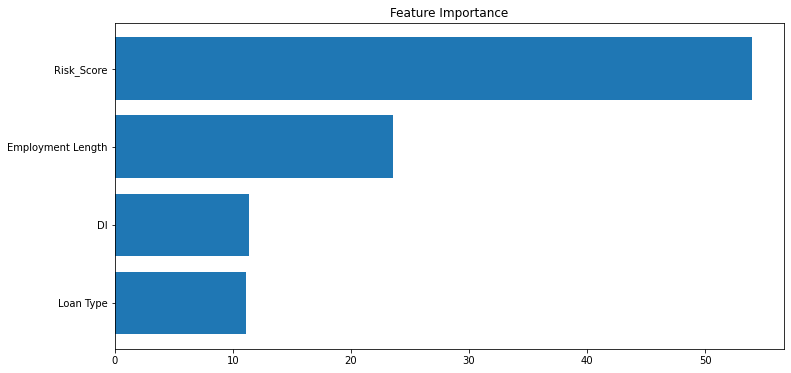

In [25]:
feature_importance = cb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance');

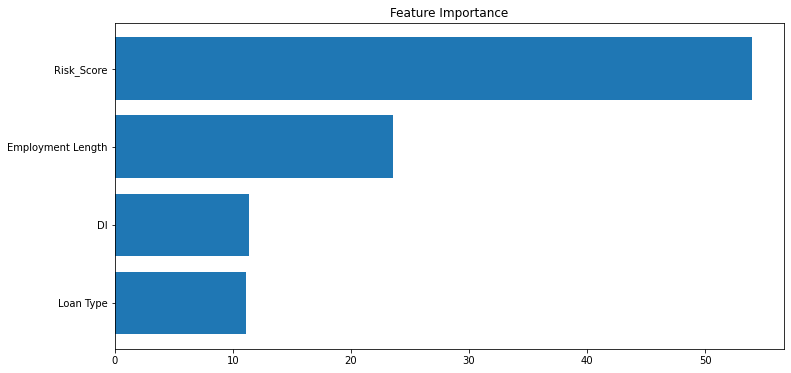

In [26]:
feature_importance = cb2.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance');

Text(0.5, 1.0, 'SHAP Importance')

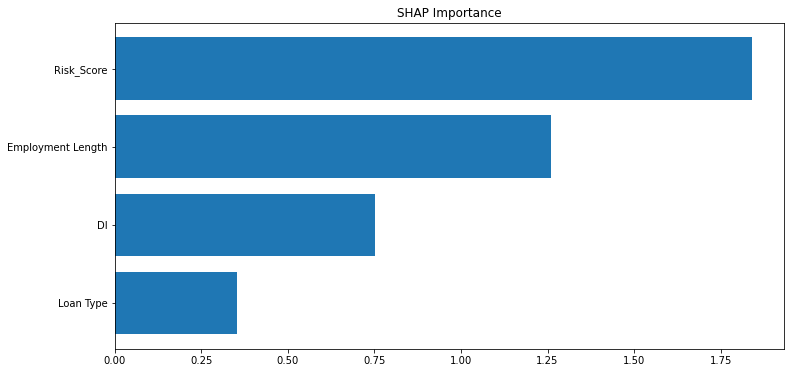

In [27]:
explainer = shap.Explainer(cb)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('SHAP Importance')

Text(0.5, 1.0, 'SHAP Importance')

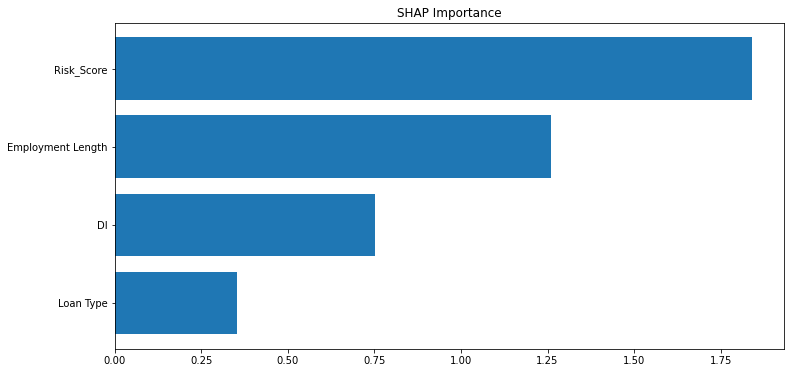

In [29]:
explainer = shap.Explainer(cb2)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('SHAP Importance')

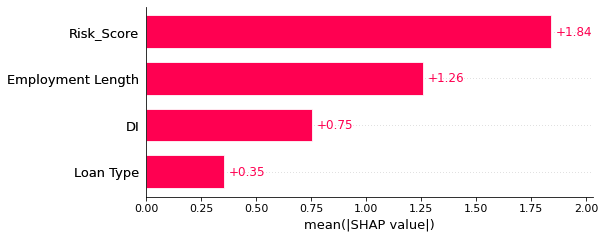

In [28]:
shap.plots.bar(shap_values, max_display=X_test.shape[0])

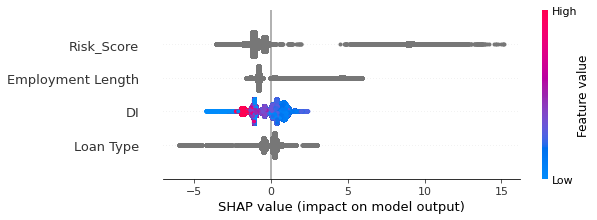

In [30]:
shap.summary_plot(shap_values, max_display=X_test.shape[0])